In [1]:
import scipy.io
from scipy import stats, optimize, interpolate
import pandas as pd
import numpy as np
from collections import defaultdict
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

## Creating the data arrays from the estimated and measured quantities

In [2]:
names=['d1','d2','d3','d5','d6','d7','d4']
meaning=['0.05% Gal','0.2% Gal','2% Gal','4% Gal','Cdc42 promoter','NO-GFP','2% Glucose']

N0=8690
reads=defaultdict(dict)
i=0
# measured quantities
for each in names:
    r= scipy.io.loadmat(each + '.mat')
    reads[each]['data'] =r[each]
    reads[each]['log10_data'] =np.log10(r[each])
    reads[each]['data_std'] =np.std(r[each])
    reads[each]['geomean']=scipy.stats.mstats.gmean((r[each]), axis=0)
    reads[each]['Names']=meaning[i]
    #reads[each]['Length of data']=len(r[each])
    reads[each]['geomean_log10']=scipy.stats.mstats.gmean(np.log10(r[each]), axis=0)
    
    i=i+1
# estimated quantities
for each in names:
    reads[each]['cdc42_copy'] = N0*(reads[each]['geomean']-reads['d4']['geomean'])/(reads['d6']['geomean']-reads['d4']['geomean'])
    reads[each]['cdc42_copy/N0'] = (reads[each]['geomean']-reads['d4']['geomean'])/(reads['d6']['geomean']-reads['d4']['geomean'])
    reads[each]['cdc42_hist/N0'] = (reads[each]['data']-reads['d4']['geomean'])/(reads['d6']['geomean']-reads['d4']['geomean'])
    reads[each]['cdc42_hist-std'] = N0*np.std(reads[each]['cdc42_hist/N0'])
    reads[each]['cdc42_hist-ste'] = scipy.stats.sem(reads[each]['data']-reads['d4']['geomean'])/(reads['d6']['geomean']-reads['d4']['geomean'])
    reads[each]['cdc42_copy_8h'] = N0*(0.3*reads[each]['geomean']-reads['d4']['geomean'])/(reads['d6']['geomean']-reads['d4']['geomean'])
    reads[each]['cdc42_hist_8h'] = N0*(0.3*reads[each]['data']-reads['d4']['geomean'])/(reads['d6']['geomean']-reads['d4']['geomean'])
    reads[each]['cdc42_hist-std_8h'] = np.std(reads[each]['cdc42_hist_8h'])




In [3]:
pd_reads=pd.DataFrame(reads).T
pd_reads.dropna()

,Names,cdc42_copy,cdc42_copy/N0,cdc42_copy_8h,cdc42_hist-std,cdc42_hist-std_8h,cdc42_hist-ste,cdc42_hist/N0,cdc42_hist_8h,data,data_std,geomean,geomean_log10,log10_data
d1,0.05% Gal,[747.0441830264751],[0.08596595892134352],[-237.00358315587604],989.198,296.759,[0.0009161231937411182],"[[0.016477976918708993], [0.16687924678274638]...","[[-418.1587522367443], [-26.062641701198874], ...","[[23.9453], [62.9713], [26.9458], [48.8967], [...",29.537,[41.97598543295089],[1.579878441391319],"[[1.379220282494868], [1.799142659111158], [1...."
d2,0.2% Gal,[20150.240833837343],[2.3187849060802463],[5583.955412087383],16673.9,5002.18,[0.022528367906316477],"[[1.5423294209067624], [0.03190618897340844], ...","[[3559.735962240111], [-377.9374034101428], [4...","[[419.872], [27.9486], [557.71], [710.213], [5...",497.876,[621.3460420195476],[2.747825074614713],"[[2.623116913811673], [1.4463600581078564], [2..."
d3,2% Gal,[58243.70691530069],[6.70238284410825],[17011.99523652639],21860.8,6558.23,[0.023999729962538255],"[[5.656524440658041], [9.404840411612312], [10...","[[14285.442378731694], [24057.30211500948], [2...","[[1487.42], [2460.03], [2737.32], [1260.12], [...",652.752,[1758.7984936120897],[3.234738322542425],"[[3.1724336167583242], [3.3909404033452546], [..."
d5,4% Gal,[52020.20990323423],[5.986215178738116],[15144.94613290645],20760.7,6228.22,[0.04736576150731157],"[[4.515084167293346], [7.081802502304558], [9....","[[11309.707586069933], [18001.142285444163], [...","[[1191.24], [1857.25], [2391.84], [1410.07], [...",619.906,[1572.9678863705362],[3.1824907062556913],"[[3.0759992679271404], [3.2688703670207335], [..."
d6,Cdc42 promoter,[8690.0],[1.0],[2145.8831619361813],4323.44,1297.03,[0.0030972984345938354],"[[1.3183731201242344], [2.289079086680223], [0...","[[2975.8818861000595], [5506.512340911521], [1...","[[361.76], [613.638], [193.831], [324.2], [216...",129.096,[279.148799993508],[2.437028664522126],"[[2.5584205450012845], [2.787912245789874], [2..."
d7,NO-GFP,[-50.68023213504391],[-0.005832017506909541],[-476.3209077043318],545.68,163.704,[0.00037663353174093847],"[[0.008777552142525595], [-0.00272394813375772...","[[-438.23375962825435], [-468.21817084852506],...","[[21.9472], [18.9628], [8.97833], [7.97859], [...",16.2937,[18.156320669963268],[1.1819224775840171],"[[1.3413791212926924], [1.2779024645826027], [..."
d4,2% Glucose,[0.0],[0.0],[-461.1168380638186],567.679,170.304,[0.0004475189706860817],"[[0.008777552142525595], [-0.00272394813375772...","[[-438.23375962825435], [-468.21817084852506],...","[[21.9472], [18.9628], [7.97859], [37.9679], [...",16.9506,[19.66960786115788],[1.2209275752001363],"[[1.3413791212926924], [1.2779024645826027], [..."


## Histograms of the cdc42 molecules

C:\Users\linigodelacruz\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'Normalized frequency')

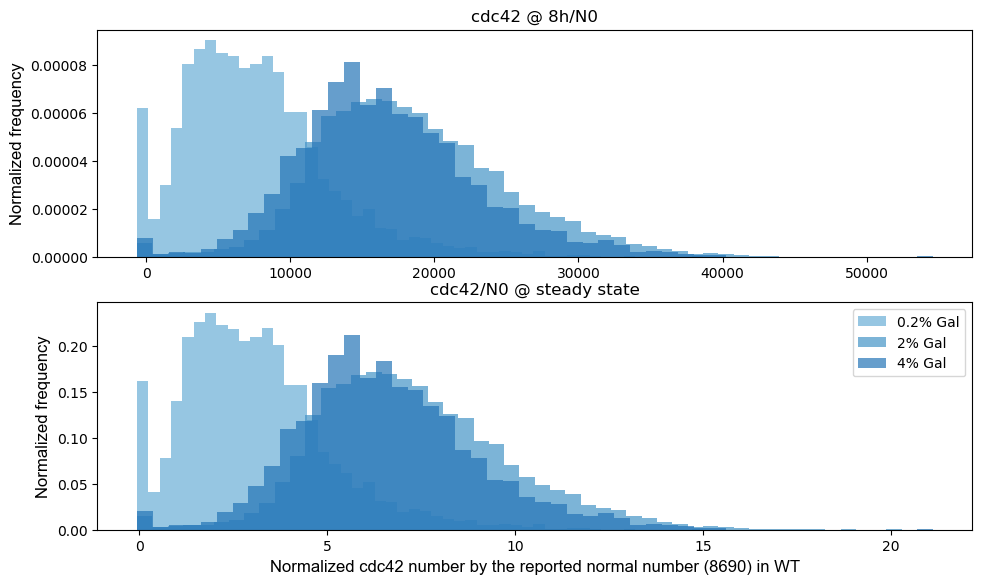

In [5]:
pd_reads=pd.DataFrame(reads).T
fig, axes = plt.subplots(2,1, figsize=(10,5), dpi=100, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0, right=1, top=1)
kwargs = dict(alpha=0.5, bins=20, density=True, stacked=True)
axis_font = {'fontname':'Arial', 'size':'12'}
colors = cm.Blues(np.linspace(0.5, 1.2, len(pd_reads['Names'])))
keys=pd_reads['Names'][1:4] 
i=1

for y, c in zip(keys, colors):
    plt.subplot(2,1,1)
    plt.hist(pd_reads['cdc42_hist_8h'][i],bins=50,density=True,label=pd_reads['Names'][i],stacked=True,alpha=0.7,color=c)
    plt.title('cdc42 @ 8h/N0')
    plt.ylabel('Normalized frequency',**axis_font)
    plt.subplot(2,1,2)
    plt.title('cdc42/N0 @ steady state')
    plt.hist(pd_reads['cdc42_hist/N0'][i],bins=50,density=True,label=pd_reads['Names'][i],stacked=True,alpha=0.7,color=c)

    i=i+1


#plt.hist(pd_reads['log10'],**kwargs,label=pd_reads['Names'])
#plt.xlim(-0.5,17)
plt.legend(prop={'size': 10},loc='upper right')
plt.xlabel('Normalized cdc42 number by the reported normal number (8690) in WT',**axis_font)
plt.ylabel('Normalized frequency',**axis_font)
#plt.xscale('log')

#plt.savefig("cdc42-by-intensities.png",dpi=300,format='png',transparent=True)



In [4]:
cdc42_dist=[]
for i in np.arange(0,7):
    cdc42_dist.append(pd_reads['cdc42_hist/N0'][i])
cdc42_copy=[]
for i in np.arange(0,7):
    cdc42_copy.append(pd_reads['cdc42_copy/N0'][i])
cdc42_names=[]
for i in np.arange(0,7):
    cdc42_names.append(pd_reads['Names'][i])

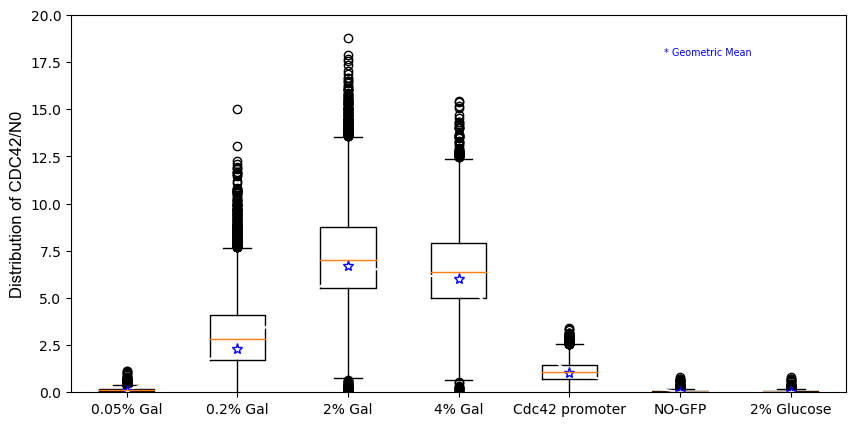

In [5]:
pd_reads=pd.DataFrame(reads).T
fig, axes = plt.subplots(1,1, figsize=(10,5), dpi=100, sharex=True, sharey=True)
kwargs = dict(alpha=0.5, bins=20, density=True, stacked=True)
axis_font = {'fontname':'Arial', 'size':'12'}
colors = cm.Blues(np.linspace(0.5, 1.2, len(pd_reads['Names'])))
keys=pd_reads['Names'] 
i=0


b=plt.boxplot(cdc42_dist)
p=plt.plot([1,2,3,4,5,6,7],cdc42_copy,color='w', marker='*', markeredgecolor='b',MarkerSize=8)



#plt.hist(pd_reads['log10'],**kwargs,label=pd_reads['Names'])
#plt.xlim(-0.5,17)
plt.ylabel('Distribution of CDC42/N0',**axis_font)

fig.text(0.715,0.8, ' * Geometric Mean', color='blue', weight='roman',
         size='x-small')

#plt.xscale('log')

plt.xticks([1,2,3,4,5,6,7], cdc42_names)
plt.ylim(0,20)
plt.tick_params(axis='y',which='minor')
plt.savefig("Cdc42-boxplot-distr-geomean.svg",dpi=300,format='svg',transparent=True)

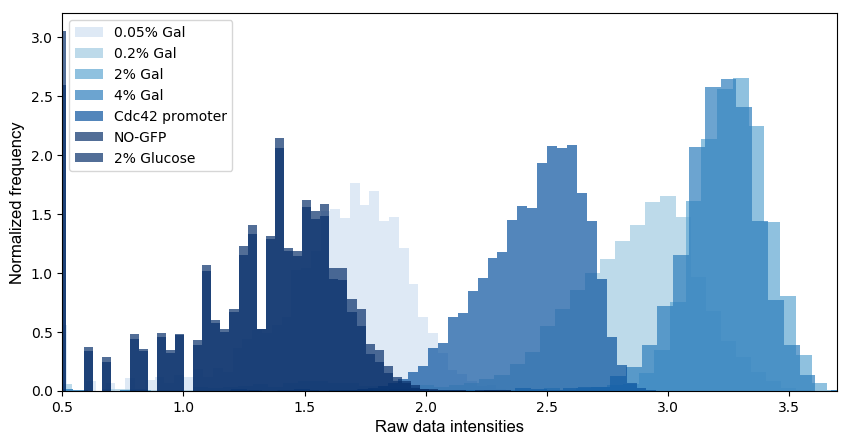

In [6]:
fig, axes = plt.subplots(1,1, figsize=(10,5), dpi=100, sharex=True, sharey=True)
kwargs = dict(alpha=0.5, bins=20, density=True, stacked=True)
axis_font = {'fontname':'Arial', 'size':'12'}
colors = cm.Blues(np.linspace(0.2, 1.2, len(pd_reads['Names'])))
keys=pd_reads['Names']   
i=0

for y, c in zip(keys, colors):
    plt.hist(pd_reads['log10_data'][i],bins=50,density=True,label=pd_reads['Names'][i],stacked=True,alpha=0.7,color=c)
    i=i+1


#plt.hist(pd_reads['log10'],**kwargs,label=pd_reads['Names'])
#plt.ylim(0,4000)
plt.legend(prop={'size': 10},loc='upper left')
plt.xlabel('Raw data intensities',**axis_font)
plt.ylabel('Normalized frequency',**axis_font)
plt.xlim(0.5,3.7)
plt.savefig("Figure-S3.png",dpi=300,format='png',transparent=True)

## cdc42 copy number calculation

In [8]:
names=['data_doublings','std_doublings'] # estimation from the population growth data
# data_doublings=[doubling @0%,doubling @0.06%,doubling @0.1%]

data_doubling_2_percent=[3/0.006,1/0.006,2/0.009,1/0.009,1/0.011,1/0.011]
meaning=['data_8h_bem1d','data_8h-24h_bem1d','data_8h_bem1dbem3d','data_8h-24h_bem1dbem3d','data_8h_wt','data_8h-24h_wt']

strains_8h=['bem1d-8h','bem1dbem3d-8h','WT+cdc42-8h']
strains_24h=['bem1d-24h','bem1dbem3d-24h','WT+cdc42-24h']

calculation=defaultdict(dict)
pos=[0,2,4] # the positions of 8h data points for the doubling times data

    
r= scipy.io.loadmat(names[0] + '.mat')#dooubling times in min
r_std= scipy.io.loadmat(names[1] + '.mat')#std doubling times in mins

# I have to fix the doubling times as a combination of the growth rate in 0% ,0.06% and 0.1%and in 2% , so far it is just for the
#specific concentrations
number_of_doublings=np.zeros((3,6))
for i in pos:
    for j in np.arange(0,3):
        if r[names[0]][:, i][j]==0:
            number_of_doublings[j,i]=8*60/data_doubling_2_percent[i]*0.5
        else:
             number_of_doublings[j,i]=np.mean([8*60/r[names[0]][:, i][j],8*60/data_doubling_2_percent[i]])



for each,i in zip(strains_8h,pos): 

    calculation[each]['Names'] = each
    calculation[each]['# of doublings'] = number_of_doublings[:,i]
    calculation[each]['std # of doublings'] = r_std[names[1]][:, i]/60
    calculation[each]['0%Gal'] = 1/2*reads['d3']['cdc42_copy_8h']/(np.power(2,number_of_doublings[:, i][0])) #converting to hours
    calculation[each]['0.06%Gal'] =1/2*reads['d3']['cdc42_copy_8h']/(np.power(2,number_of_doublings[:, i][1]))+reads['d1']['cdc42_copy_8h']
    calculation[each]['0.1%Gal'] = 1/2*reads['d3']['cdc42_copy_8h']/(np.power(2,number_of_doublings[:, i][2]))+0.5*reads['d2']['cdc42_copy_8h']
    calculation[each]['0%Gal-std']=calculation[each]['0%Gal']*np.sqrt((reads['d3']['cdc42_hist-std_8h']/(0.5*reads['d3']['cdc42_copy_8h']))**2 + (calculation[each]['std # of doublings'][0]/np.power(2,number_of_doublings[:, i][0]))**2)
    calculation[each]['0.06%Gal-std']=calculation[each]['0.06%Gal']*np.sqrt((reads['d3']['cdc42_hist-std_8h']/(0.5*reads['d3']['cdc42_copy_8h']))**2 + (calculation[each]['std # of doublings'][1]/np.power(2,number_of_doublings[:, i][1]))**2)
    calculation[each]['0.1%Gal-std']=calculation[each]['0.1%Gal']*np.sqrt((reads['d3']['cdc42_hist-std_8h']/(0.5*reads['d3']['cdc42_copy_8h']))**2 + (calculation[each]['std # of doublings'][2]/np.power(2,number_of_doublings[:, i][2]))**2)

    
    
pos_24h=[1,3,5]# the positions of 24h data points for the doubling times data

for i in pos_24h:
    for j in np.arange(0,3):
        if r[names[0]][:, i][j]==0:
            number_of_doublings[j,i]=24*60/data_doubling_2_percent[i]*0.5
        else:
             number_of_doublings[j,i]=np.mean([24*60/r[names[0]][:, i][j],24*60/data_doubling_2_percent[i]])
        
        
for each,i in zip(strains_24h,pos_24h): 
    
    calculation[each]['Names'] = each
    calculation[each]['# of doublings'] = number_of_doublings[:,i]
    calculation[each]['std # of doublings'] = r_std[names[1]][:, i]/60
    calculation[each]['0%Gal'] = 1/8*reads['d3']['cdc42_copy']/(np.power(2,number_of_doublings[:, i][0]))
    calculation[each]['0.06%Gal'] = 1/8*reads['d3']['cdc42_copy']/(np.power(2,number_of_doublings[:, i][1]))+reads['d1']['cdc42_copy']
    calculation[each]['0.1%Gal'] = 1/8*reads['d3']['cdc42_copy']/(np.power(2,number_of_doublings[:, i][2]))+0.5*reads['d2']['cdc42_copy']
    calculation[each]['0%Gal-std']=calculation[each]['0%Gal']*np.sqrt((reads['d3']['cdc42_hist-std']/(0.125*reads['d3']['cdc42_copy']))**2 + (calculation[each]['std # of doublings'][0]/np.power(2,number_of_doublings[:, i][0]))**2)
    calculation[each]['0.06%Gal-std']=calculation[each]['0.06%Gal']*np.sqrt((reads['d3']['cdc42_hist-std']/(0.125*reads['d3']['cdc42_copy']))**2 + (calculation[each]['std # of doublings'][1]/np.power(2,number_of_doublings[:, i][1]))**2)
    calculation[each]['0.1%Gal-std']=calculation[each]['0.1%Gal']*np.sqrt((reads['d3']['cdc42_hist-std']/(0.125*reads['d3']['cdc42_copy']))**2 + (calculation[each]['std # of doublings'][2]/np.power(2,number_of_doublings[:, i][2]))**2)

strains_wt=['WT-8h','WT-24h']  
for each in strains_wt:
    calculation[each]['0%Gal']=8690
    calculation[each]['0.06%Gal']=8690
    calculation[each]['0.1%Gal']=8690
    calculation[each]['Names'] = each
    calculation[each]['0%Gal-std']=0
    calculation[each]['0.06%Gal-std']=0
    calculation[each]['0.1%Gal-std']=0


In [9]:


pd_calculation=pd.DataFrame(calculation).T
pd_calculation.T


,bem1d-8h,bem1dbem3d-8h,WT+cdc42-8h,bem1d-24h,bem1dbem3d-24h,WT+cdc42-24h,WT-8h,WT-24h
# of doublings,"[1.14, 1.14, 1.38]","[2.1, 2.4, 2.5200000000000005]","[3.8399999999999994, 4.74, 4.859999999999999]","[4.32, 4.32, 5.76]","[6.4799999999999995, 10.08, 11.52]","[7.919999999999999, 13.319999999999999, 14.04]",NaN,NaN
0%Gal,[3859.6778868279985],[1984.0941009432668],[593.9776084599005],[364.50999350785736],[81.56139569833124],[30.06086374933716],8690,8690
0%Gal-std,[3054.3574227902227],[1531.6367950700158],[458.07090557557274],[1094.5008738158758],[244.90143055444562],[90.26266008424342],0,0
0.06%Gal,[3622.6743036721223],[1374.5816049315633],[81.30113588817088],[1111.5541765343326],[753.7704897038268],[747.7561166075452],8690,8690
0.06%Gal-std,[2866.8045557723617],[1079.952979452014],[62.70598102202466],[3337.6232179606573],[2263.319180080793],[2245.2600416743485],0,0
0.1%Gal,[6060.141863944604],[4274.938494051719],[3084.877777643644],[10209.466882624574],[10077.599513638792],[10075.552629974753],8690,8690
0.1%Gal-std,[15840.97613118134],[3301.9559183211077],[2378.61063786231],[30691.307691420887],[30259.64080572277],[30253.494702896933],0,0
Names,bem1d-8h,bem1dbem3d-8h,WT+cdc42-8h,bem1d-24h,bem1dbem3d-24h,WT+cdc42-24h,WT-8h,WT-24h
std # of doublings,"[0.3928371006591932, 0.3928371006591932, 6.500...","[0.16368212527466375, 0.796959958868849, 0.265...","[0.23808309130860175, 0.5428042121816251, 0.23...","[0.0, 0.0, 7.856742013183862]","[0.0, 0.0, 0.0]","[0.0, 0.654728501098655, 0.16368212527466375]",NaN,NaN


In [10]:
#measured quantities 
names=['bem1d + Galpr-CDC42 @8h','bem1bem3 deleted + Galpr-CDC42 @8h','WT + Galpr-CDC42 @8h','WT @8h','bem1d + Galpr-CDC42 @24h',
      'bem1bem3 deleted + Galpr-CDC42 @24h','WT + Galpr-CDC42 @24h','WT @24h']
cell_radii=np.array([[5.825, 4.240, 4.125],[5.25, 3.995 , 3.915],[3.185,3.25,3.2],[3.29,3.13, 3.145],
                    [7.36,4.45,4.22],[7.5,3.6,3.97],[6.12,3.04,3.35],[2.85,2.94,2.96]]) # measured quantity



cell_radii_std=np.array([[0.601040764,0.22627417,0.318198052],[0.494974747,0.417193001,0.16263456],
                         [0.06363961,0.070710678,0.141421356],[0.296984848,0,0.06363961],[0.93,1.33,1.68],
                         [0.75,1.11,1.85],[0.93,1.29,0.75],[0.43,0.42,0.83]])

In [11]:
quantities_0=defaultdict(dict)
i=0
names=['b1d-8h','b1-3d-8h','WT+42-8h','WT-8h','b1d-24h',
      'b1-3d-24h','WT+42-24h','WT-24h']
strains=['bem1d-8h','bem1dbem3d-8h','WT+cdc42-8h','WT-8h','bem1d-24h','bem1dbem3d-24h','WT+cdc42-24h','WT-24h']


# a forloop per galactose concentration 
for strains_name in strains:
        quantities_0[strains_name]['Name']=names[i]
        quantities_0[strains_name]['cdc42_copy_number']=calculation[strains_name]['0%Gal']
        quantities_0[strains_name]['cdc42_number_std']=calculation[strains_name]['0%Gal-std'] 
        quantities_0[strains_name]['cell_radius(um)']=cell_radii[i,:][0]
        quantities_0[strains_name]['cell_radius-std']=cell_radii_std[i,:][0]
        quantities_0[strains_name]['cell volume']=4/3*math.pi*np.power(cell_radii[i,:][0],3)
        quantities_0[strains_name]['cell volume-std']=quantities_0[strains_name]['cell volume']*3*quantities_0[strains_name]['cell_radius-std']/quantities_0[strains_name]['cell_radius(um)']
        quantities_0[strains_name]['cdc42 density']=calculation[strains_name]['0%Gal']/quantities_0[strains_name]['cell volume']
        quantities_0[strains_name]['cdc42 density-std']=quantities_0[strains_name]['cdc42 density']*np.sqrt((quantities_0[strains_name]['cdc42_number_std']/(quantities_0[strains_name]['cdc42_copy_number']))**2 + (quantities_0[strains_name]['cell volume-std']/quantities_0[strains_name]['cell volume'])**2)
        i=i+1
quantities_1=defaultdict(dict) #0.06%
i=0
for strains_name in strains:
        quantities_1[strains_name]['Name']=names[i]
        quantities_1[strains_name]['cdc42_copy_number']=calculation[strains_name]['0.06%Gal']   
        quantities_1[strains_name]['cdc42_number_std']=calculation[strains_name]['0.06%Gal-std'] 
        quantities_1[strains_name]['cell_radius(um)']=cell_radii[i,:][1]
        quantities_1[strains_name]['cell_radius-std']=cell_radii_std[i,:][1]
        quantities_1[strains_name]['cell volume']=4/3*math.pi*np.power(cell_radii[i,:][1],3)
        quantities_1[strains_name]['cell volume-std']=quantities_1[strains_name]['cell volume']*3*quantities_1[strains_name]['cell_radius-std']/quantities_1[strains_name]['cell_radius(um)']
        quantities_1[strains_name]['cdc42 density']=calculation[strains_name]['0.06%Gal']/quantities_1[strains_name]['cell volume']
        quantities_1[strains_name]['cdc42 density-std']=quantities_1[strains_name]['cdc42 density']*np.sqrt((quantities_1[strains_name]['cdc42_number_std']/(quantities_1[strains_name]['cdc42_copy_number']))**2 + (quantities_1[strains_name]['cell volume-std']/quantities_1[strains_name]['cell volume'])**2)

        i=i+1
        
quantities_2=defaultdict(dict) #0.1%
i=0
for strains_name in strains:
        quantities_2[strains_name]['Name']=names[i]
        quantities_2[strains_name]['cdc42_copy_number']=calculation[strains_name]['0.1%Gal'] 
        quantities_2[strains_name]['cdc42_number_std']=calculation[strains_name]['0.1%Gal-std']
        quantities_2[strains_name]['cell_radius(um)']=cell_radii[i,:][2]
        quantities_2[strains_name]['cell_radius-std']=cell_radii_std[i,:][2]
        quantities_2[strains_name]['cell volume']=4/3*math.pi*np.power(cell_radii[i,:][2],3)
        quantities_2[strains_name]['cell volume-std']=quantities_2[strains_name]['cell volume']*3*quantities_2[strains_name]['cell_radius-std']/quantities_2[strains_name]['cell_radius(um)']
        quantities_2[strains_name]['cdc42 density']=calculation[strains_name]['0.1%Gal']/quantities_2[strains_name]['cell volume']
        quantities_2[strains_name]['cdc42 density-std']=quantities_2[strains_name]['cdc42 density']*np.sqrt((quantities_2[strains_name]['cdc42_number_std']/(quantities_2[strains_name]['cdc42_copy_number']))**2 + (quantities_2[strains_name]['cell volume-std']/quantities_2[strains_name]['cell volume'])**2)

        i=i+1

In [13]:
keys=['0%-Gal','0.06%-Gal','0.1%-Gal']
pd_quantities_0=pd.DataFrame(quantities_0).T
pd_quantities_1=pd.DataFrame(quantities_1).T
pd_quantities_2=pd.DataFrame(quantities_2).T

frames = [pd_quantities_0,pd_quantities_1,pd_quantities_2]
df_quantities = pd.concat(frames, keys=keys,sort=False).T


df_quantities.T


Name          cdc42 density  \
0%-Gal    bem1d-8h           b1d-8h    [4.662025700271173]   
          bem1dbem3d-8h    b1-3d-8h   [3.2733748879776186]   
          WT+cdc42-8h      WT+42-8h    [4.388874416605421]   
          WT-8h               WT-8h                58.2564   
          bem1d-24h         b1d-24h  [0.21826665220295646]   
          bem1dbem3d-24h  b1-3d-24h  [0.04615430858973677]   
          WT+cdc42-24h    WT+42-24h  [0.03130823459967173]   
          WT-24h             WT-24h                89.6183   
0.06%-Gal bem1d-8h           b1d-8h   [11.346008680326717]   
          bem1dbem3d-8h    b1-3d-8h    [5.146732156301259]   
          WT+cdc42-8h      WT+42-8h   [0.5654027560020372]   
          WT-8h               WT-8h                67.6547   
          bem1d-24h         b1d-24h    [3.011355251817546]   
          bem1dbem3d-24h  b1-3d-24h    [3.856941209913922]   
          WT+cdc42-24h    WT+42-24h    [6.354049797068055]   
          WT-24h             WT-24h                81.6374   
0.1%-Gal  bem1d-8h           b1d-8h    [20.61210389616316]   
          bem1dbem3d-8h    b1-3d-8h   [17.007714704791702]   
          WT+cdc42-8h      WT+42-8h   [22.474985373519594]   
          WT-8h               WT-8h                66.6913   
          bem1d-24h         b1d-24h   [32.432251751876514]   
          bem1dbem3d-24h  b1-3d-24h    [38.45005503838255]   
          WT+cdc42-24h    WT+42-24h   [63.980237147908284]   
          WT-24h             WT-24h                79.9937   

                              cdc42 density-std     cdc42_copy_number  \
0%-Gal    bem1d-8h          [3.961503725168095]  [3859.6778868279985]   
          bem1dbem3d-8h    [2.6911815290459726]  [1984.0941009432668]   
          WT+cdc42-8h      [3.3948748034214664]   [593.9776084599005]   
          WT-8h                         15.7762                  8690   
          bem1d-24h        [0.6605834772675329]  [364.50999350785736]   
          bem1dbem3d-24h  [0.13927584329800535]   [81.56139569833124]   
          WT+cdc42-24h    [0.09508541847046989]   [30.06086374933716]   
          WT-24h                        40.5641                  8690   
0.06%-Gal bem1d-8h          [9.160574213377577]  [3622.6743036721223]   
          bem1dbem3d-8h     [4.353201649039782]  [1374.5816049315633]   
          WT+cdc42-8h      [0.4376429060450566]   [81.30113588817088]   
          WT-8h                               0                  8690   
          bem1d-24h         [9.436615097510009]  [1111.5541765343326]   
          bem1dbem3d-24h   [12.118171358069903]   [753.7704897038268]   
          WT+cdc42-24h     [20.722956256055816]   [747.7561166075452]   
          WT-24h                        34.9875                  8690   
0.1%-Gal  bem1d-8h          [54.08997517059049]   [6060.141863944604]   
          bem1dbem3d-8h    [13.306627424214517]   [4274.938494051719]   
          WT+cdc42-8h      [17.583771866717516]   [3084.877777643644]   
          WT-8h                         4.04853                  8690   
          bem1d-24h        [104.90913995523594]  [10209.466882624574]   
          bem1dbem3d-24h   [127.35242269721395]  [10077.599513638792]   
          WT+cdc42-24h     [196.85847861913598]  [10075.552629974753]   
          WT-24h                         67.292                  8690   

                              cdc42_number_std cell volume cell volume-std  \
0%-Gal    bem1d-8h        [3054.3574227902227]     827.897         256.275   
          bem1dbem3d-8h   [1531.6367950700158]     606.131          171.44   
          WT+cdc42-8h     [458.07090557557274]     135.337         8.11253   
          WT-8h                              0     149.168         40.3958   
          bem1d-24h       [1094.5008738158758]     1670.02         633.065   
          bem1dbem3d-24h  [244.90143055444562]     1767.15         530.144   
          WT+cdc42-24h     [90.26266008424342]     960.158         437.719   
          WT-24h              

## cdc42 density across genotypes

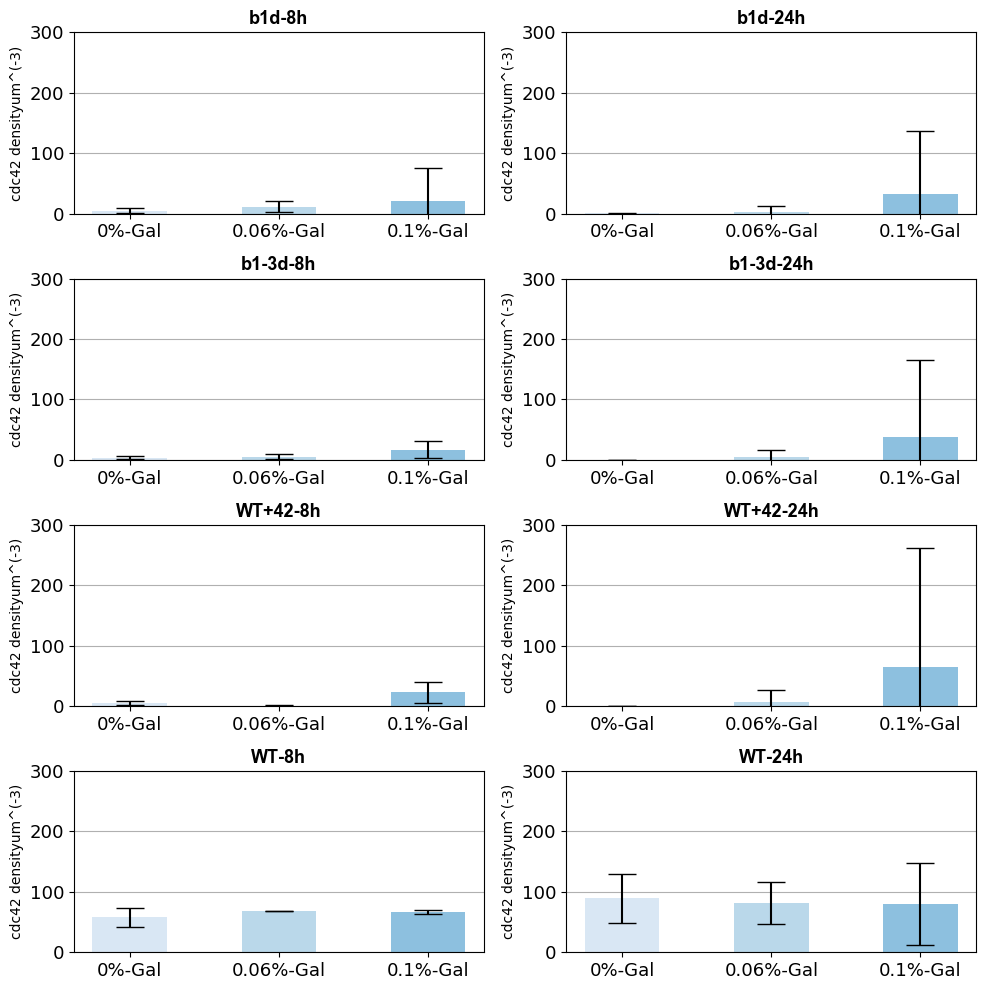

In [53]:
pd_reads=df_quantities.T
gal=[['0%-Gal'],['0.06%-Gal'],['0.1%-Gal']]
fig, axes = plt.subplots(4,2, figsize=(10,10), dpi=100, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0, right=2.5, top=2)
kwargs = dict(alpha=0.5, bins=20, density=True, stacked=True)
axis_font = {'fontname':'Arial', 'size':'13','fontweight':'bold'}
colors = cm.Blues(np.linspace(0.2, 1.2, 8))
#colors=['blue','black','lightgreen']

variables=['cdc42 density','cdc42_copy_number','cell volume','cdc42 density-std']
width = 0.5 
j=1

pos_names=np.arange(0,8)
pos_subplot=[1,3,5,7,2,4,6,8]
for strains,j in zip (pos_names,pos_subplot): 
    plt.subplot(4,2,j)
    for keys,c in zip(gal,colors):
        plt.bar(x=keys,height=pd_reads.T[keys].loc[variables[0]][strains],yerr=pd_reads.T[keys].loc[variables[3]][strains],align='center',capsize=10,alpha=0.8,width=width,color=c)
        plt.tick_params(labelsize=13)
        plt.ylim(0,300)
        plt.grid(True,axis='y')
        plt.title(pd_reads.T[keys].loc['Name'][strains],**axis_font)
        plt.ylabel(variables[0] + 'um^(-3)')
        
    
plt.tight_layout()    
plt.savefig("cdc42-density.png",dpi=300,format='png',transparent=True)

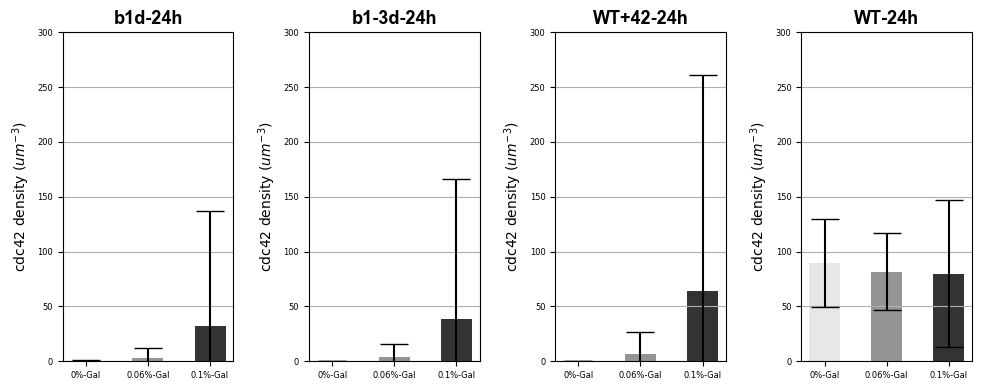

In [20]:
pd_reads=df_quantities.T
gal=[['0%-Gal'],['0.06%-Gal'],['0.1%-Gal']]
fig, axes = plt.subplots(1,4, figsize=(10,4), dpi=100, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0, right=0.5, top=0.3)
kwargs = dict(alpha=0.5, bins=20, density=True, stacked=True)
axis_font = {'fontname':'Arial', 'size':'13','fontweight':'bold'}
colors = cm.Greys(np.linspace(0.2, 1, 3))
#colors=['blue','black','lightgreen']

variables=['cdc42 density','cdc42_copy_number','cell volume','cdc42 density-std']
width = 0.5 
j=1

pos_names=np.arange(4,8)
pos_subplot=[1,2,3,4]
for strains,j in zip (pos_names,pos_subplot): 
    plt.subplot(1,4,j)
    for keys,c in zip(gal,colors):
        plt.bar(x=keys,height=pd_reads.T[keys].loc[variables[0]][strains],yerr=pd_reads.T[keys].loc[variables[3]][strains],align='center',capsize=10,alpha=0.8,width=width,color=c)
        plt.tick_params(labelsize=6)
        plt.ylim(0,300)
        plt.grid(True,axis='y')
        plt.title(pd_reads.T[keys].loc['Name'][strains],**axis_font)
        plt.ylabel(variables[0] + ' ($um^{-3}$)')
        
    
plt.tight_layout()    
plt.savefig("cdc42-density-24.svg",dpi=300,format='svg',transparent=True)

## cdc42 copy number across genotypes

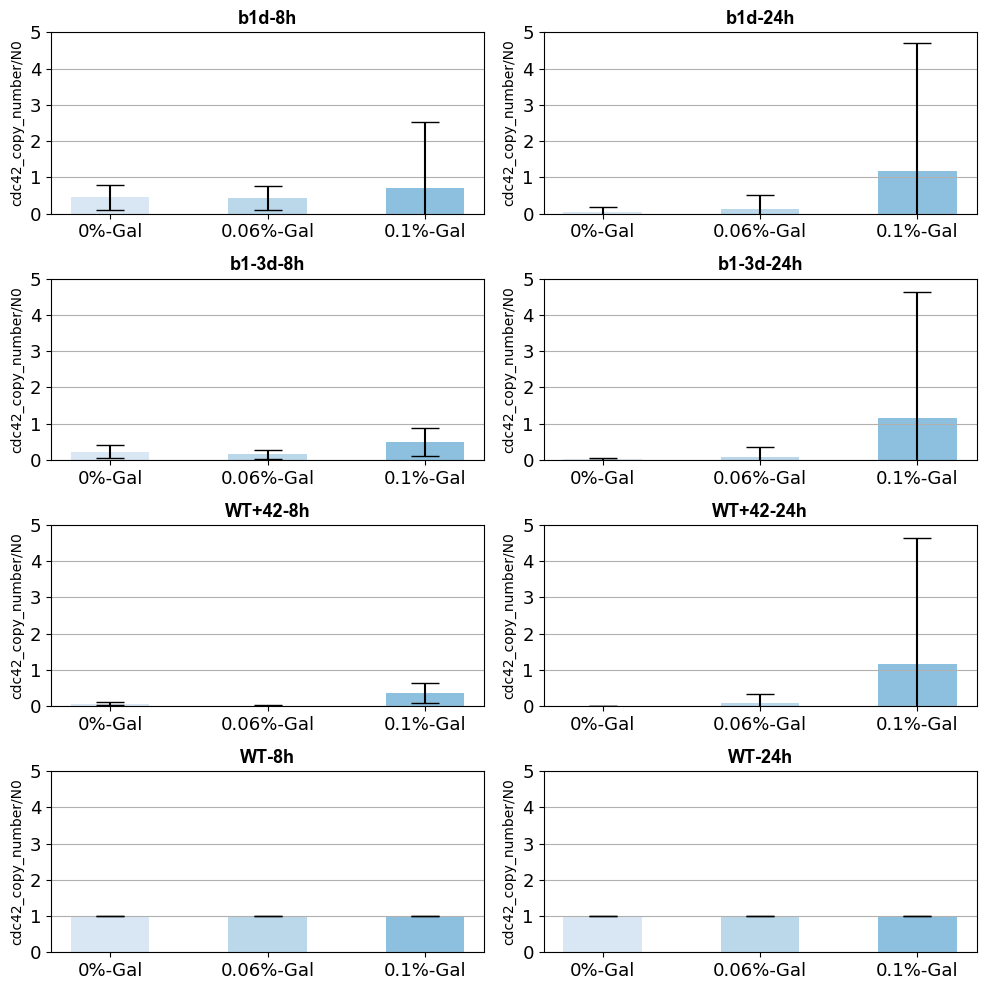

In [143]:
pd_reads=df_quantities.T
gal=[['0%-Gal'],['0.06%-Gal'],['0.1%-Gal']]
fig, axes = plt.subplots(4,2, figsize=(10,10), dpi=100, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0, right=2.5, top=2)
kwargs = dict(alpha=0.5, bins=20, density=True, stacked=True)
axis_font = {'fontname':'Arial', 'size':'13','fontweight':'bold'}
colors = cm.Blues(np.linspace(0.2, 1.2, 8))
#colors=['blue','black','lightgreen']

variables=['cdc42 density','cdc42_copy_number','cell volume','cdc42_number_std']
width = 0.5 
j=1

pos_names=np.arange(0,8)
pos_subplot=[1,3,5,7,2,4,6,8]
for strains,j in zip (pos_names,pos_subplot): 
    plt.subplot(4,2,j)
    for keys,c in zip(gal,colors):
        plt.bar(x=keys,height=pd_reads.T[keys].loc[variables[1]][strains]/8690,yerr=pd_reads.T[keys].loc[variables[3]][strains]/8690,align='center',alpha=0.8,width=width,capsize=10,color=c)
        plt.tick_params(labelsize=13)
        plt.ylim(0,5)
        plt.grid(True,axis='y')
        plt.title(pd_reads.T[keys].loc['Name'][strains],**axis_font)
        plt.ylabel(variables[1] + '/N0' )
        
plt.tight_layout()    
plt.savefig("cdc42-copy-number.png",dpi=300,format='png',transparent=True)

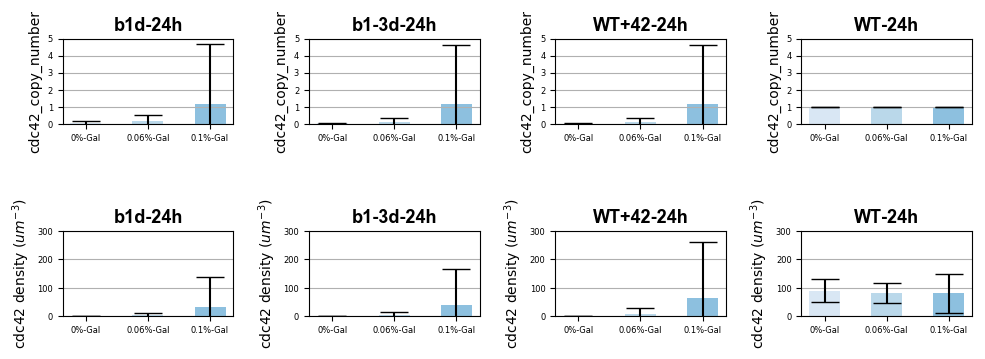

In [85]:
pd_reads=df_quantities.T
gal=[['0%-Gal'],['0.06%-Gal'],['0.1%-Gal']]
fig, axes = plt.subplots(2,4, figsize=(10,4), dpi=100, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0, right=0.5, top=0.3)
kwargs = dict(alpha=0.5, bins=20, density=True, stacked=True)
axis_font = {'fontname':'Arial', 'size':'13','fontweight':'bold'}
colors = cm.Blues(np.linspace(0.2, 1.2, 8))
#colors=['blue','black','lightgreen']

variables=['cdc42 density','cdc42_copy_number','cell volume','cdc42_number_std']
width = 0.5 
j=1


        


pos_names=np.arange(4,8)
pos_subplot=[1,2,3,4]
for strains,j in zip (pos_names,pos_subplot): 
    plt.subplot(2,4,j)
    for keys,c in zip(gal,colors):
        plt.bar(x=keys,height=pd_reads.T[keys].loc[variables[1]][strains]/8690,yerr=pd_reads.T[keys].loc[variables[3]][strains]/8690,align='center',capsize=10,alpha=0.8,width=width,color=c)
        plt.tick_params(labelsize=6)
        plt.ylim(0,5)
        plt.grid(True,axis='y')
        plt.title(pd_reads.T[keys].loc['Name'][strains],**axis_font)
        plt.ylabel(variables[1])
        
variables=['cdc42 density','cdc42_copy_number','cell volume','cdc42 density-std']
pos_names=np.arange(4,8)
pos_subplot=[5,6,7,8]
for strains,j in zip (pos_names,pos_subplot): 
    plt.subplot(2,4,j)
    for keys,c in zip(gal,colors):
        plt.bar(x=keys,height=pd_reads.T[keys].loc[variables[0]][strains],yerr=pd_reads.T[keys].loc[variables[3]][strains],align='center',capsize=10,alpha=0.8,width=width,color=c)
        plt.tick_params(labelsize=6)
        plt.ylim(0,300)
        plt.grid(True,axis='y')
        plt.title(pd_reads.T[keys].loc['Name'][strains],**axis_font)
        plt.ylabel(variables[0] + ' ($um^{-3}$)')
        
plt.tight_layout()    
#plt.savefig("cdc42-number-24.svg",dpi=300,format='svg',transparent=True)

## Cell volume across genotypes

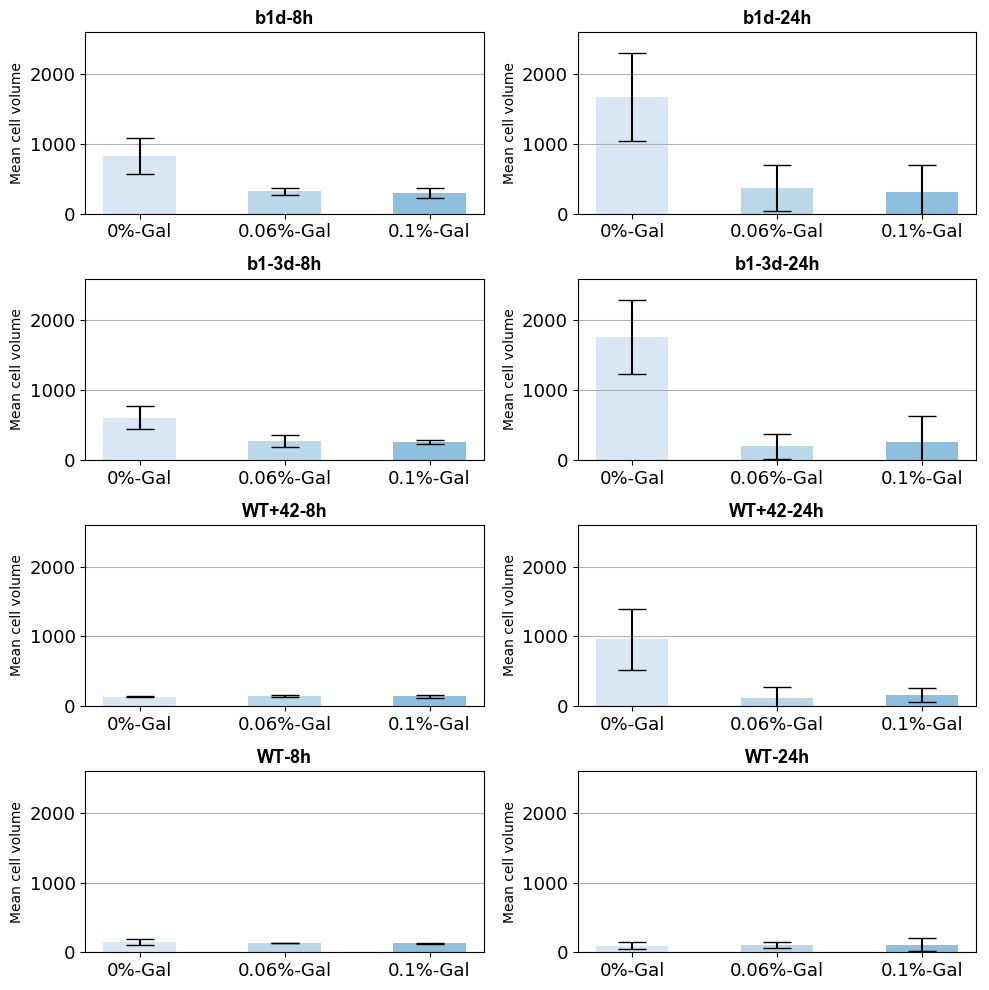

In [144]:
pd_reads=df_quantities.T
gal=[['0%-Gal'],['0.06%-Gal'],['0.1%-Gal']]
fig, axes = plt.subplots(4,2, figsize=(10,10), dpi=100, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0, right=2.5, top=2)
kwargs = dict(alpha=0.5, bins=20, density=True, stacked=True)
axis_font = {'fontname':'Arial', 'size':'13','fontweight':'bold'}
colors = cm.Blues(np.linspace(0.2, 1.2, 8))
#colors=['blue','black','lightgreen']

variables=['cdc42 density','cdc42_copy_number','cell volume','cell volume-std']
width = 0.5 
j=1

pos_names=np.arange(0,8)
pos_subplot=[1,3,5,7,2,4,6,8]
for strains,j in zip (pos_names,pos_subplot): 
    plt.subplot(4,2,j)
    for keys,c in zip(gal,colors):
        plt.bar(x=keys,height=pd_reads.T[keys].loc[variables[2]][strains],alpha=0.8,width=width,color=c,yerr=pd_reads.T[keys].loc[variables[3]][strains],align='center',capsize=10, ecolor='black')
        plt.tick_params(labelsize=13)
        plt.ylim(0,2600)
        plt.grid(True,axis='y')
        plt.title(pd_reads.T[keys].loc['Name'][strains],**axis_font)
        plt.ylabel('Mean '+ variables[2] )
plt.tight_layout()    
plt.savefig("cell-volume.png",dpi=300,format='png',transparent=True)

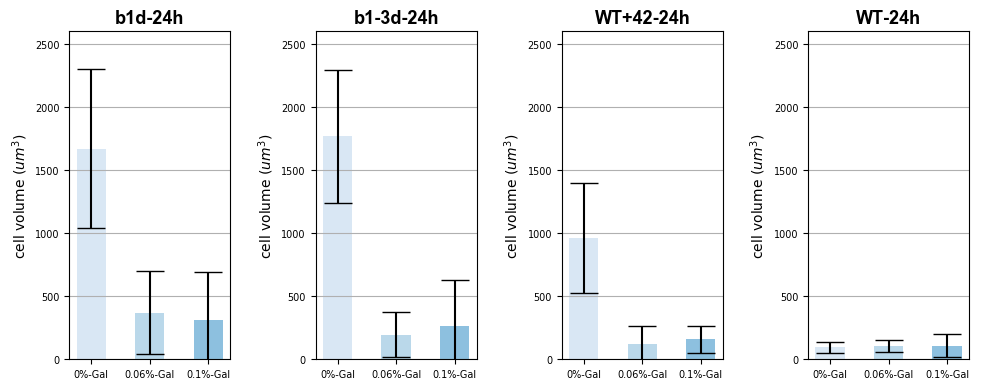

In [79]:
pd_reads=df_quantities.T
gal=[['0%-Gal'],['0.06%-Gal'],['0.1%-Gal']]
fig, axes = plt.subplots(1,4, figsize=(10,4), dpi=100, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0, right=0.5, top=0.3)
kwargs = dict(alpha=0.5, bins=20, density=True, stacked=True)
axis_font = {'fontname':'Arial', 'size':'13','fontweight':'bold'}
colors = cm.Blues(np.linspace(0.2, 1.2, 8))
#colors=['blue','black','lightgreen']

variables=['cdc42 density','cdc42_copy_number','cell volume','cell volume-std']
width = 0.5 
j=1

pos_names=np.arange(4,8)
pos_subplot=[1,2,3,4]
for strains,j in zip (pos_names,pos_subplot): 
    plt.subplot(1,4,j)
    for keys,c in zip(gal,colors):
        plt.bar(x=keys,height=pd_reads.T[keys].loc[variables[2]][strains],yerr=pd_reads.T[keys].loc[variables[3]][strains],align='center',capsize=10,alpha=0.8,width=width,color=c)
        plt.tick_params(labelsize=7)
        plt.ylim(0,2600)
        plt.grid(True,axis='y')
        plt.title(pd_reads.T[keys].loc['Name'][strains],**axis_font)
        plt.ylabel(variables[2] + ' ($um^{3}$)')
        
    
plt.tight_layout()    
plt.savefig("cdc42-volume-24.svg",dpi=300,format='svg',transparent=True)

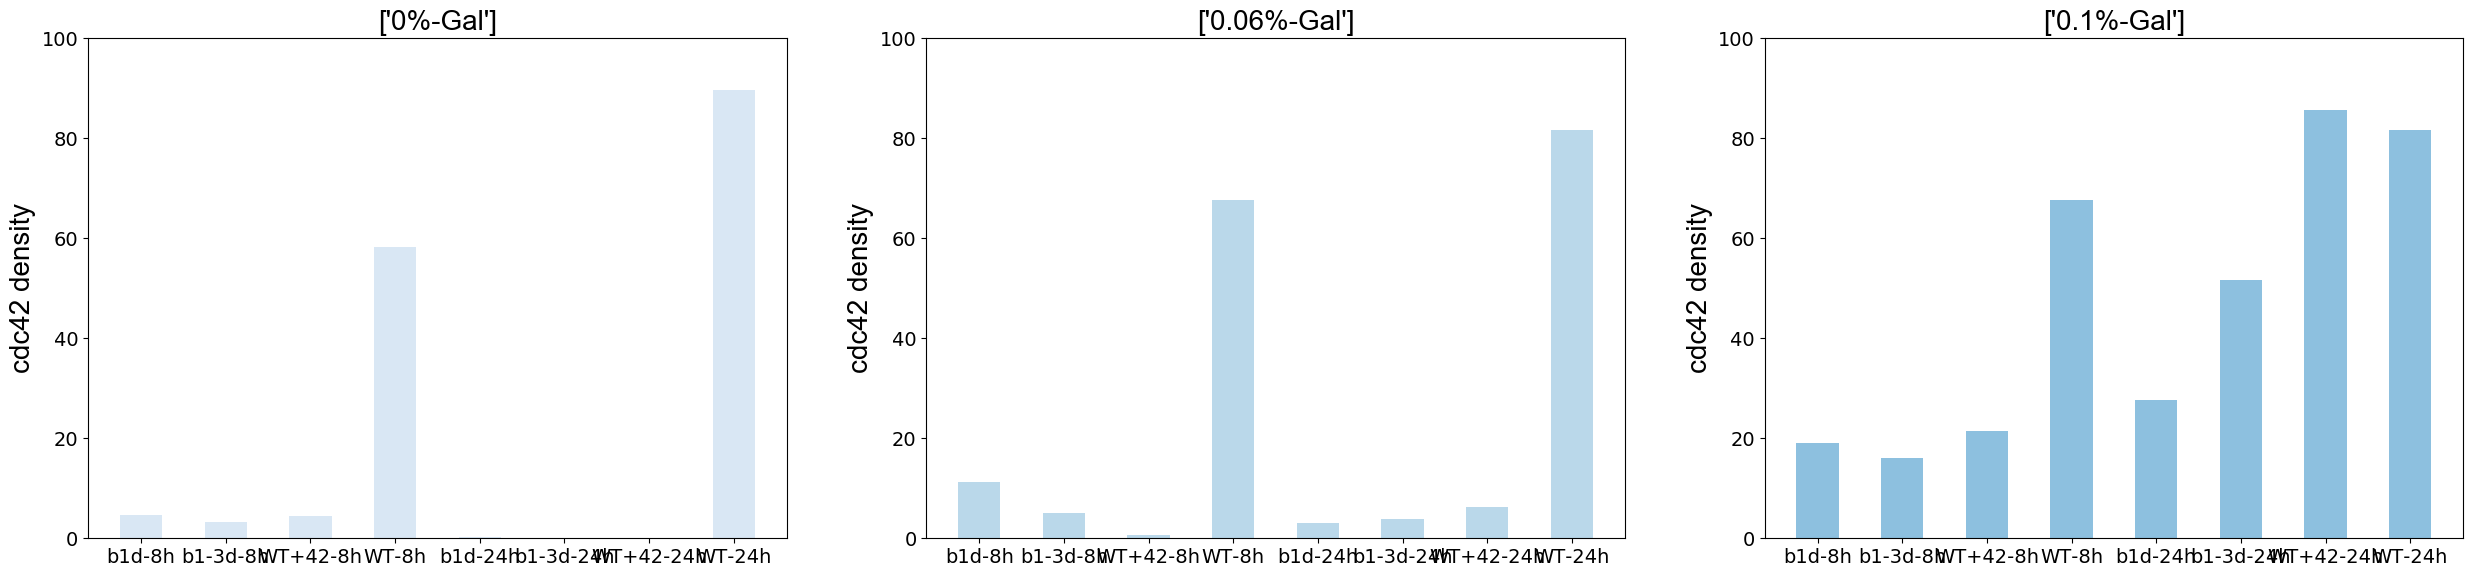

In [74]:
pd_reads=df_quantities.T
gal=[['0%-Gal'],['0.06%-Gal'],['0.1%-Gal']]
fig, axes = plt.subplots(1,3, figsize=(10,10), dpi=100, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.2, right=2.5, top=0.7)
kwargs = dict(alpha=0.5, bins=20, density=True, stacked=True)
axis_font = {'fontname':'Arial', 'size':'20'}
colors = cm.Blues(np.linspace(0.2, 1.2, 8))
#colors=['blue','black','lightgreen']

variables=['cdc42 density','cdc42_copy_number','cell volume']
width = 0.5 
j=1
for keys, c in zip(gal,colors): 
    plt.subplot(1,3,j)
    plt.bar(x=pd_reads.T[keys].loc['Name'],height=pd_reads.T[keys].loc[variables[0]],alpha=0.8,width=width,color=c)
    plt.title(keys,**axis_font)
    plt.tick_params(labelsize=14)
    plt.ylabel(variables[0],**axis_font)
    plt.ylim(0,100)
    j=j+1


    



In [ ]:
fig, axes = plt.subplots(1,3, figsize=(10,10), dpi=100, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0, right=2.5, top=0.7)
j=1
for keys, c in zip(gal,colors): 
    plt.subplot(1,3,j)
    plt.bar(x=pd_reads.T[keys].loc['Name'],height=pd_reads.T[keys].loc[variables[1]]/8690,alpha=0.8,width=width,color=c)
    plt.title(keys,**axis_font)
    plt.tick_params(labelsize=14)
    plt.ylabel(variables[1] +'-normalized to the WT',**axis_font)
    plt.ylim(0,1.3)
    j=j+1  

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(10,10), dpi=100, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0, right=2.5, top=0.7)
j=1
for keys, c in zip(gal,colors): 
    plt.subplot(1,3,j)
    plt.bar(x=pd_reads.T[keys].loc['Name'],height=pd_reads.T[keys].loc[variables[2]],alpha=0.8,width=width,color=c)
    plt.title(keys,**axis_font)
    plt.tick_params(labelsize=14)
    plt.ylabel(variables[2],**axis_font)
    plt.ylim(0,1800)
    j=j+1  

In [64]:
pd_reads.T[keys].loc[variables[0]].max()

array([85.61690332])

C:\Users\linigodelacruz\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


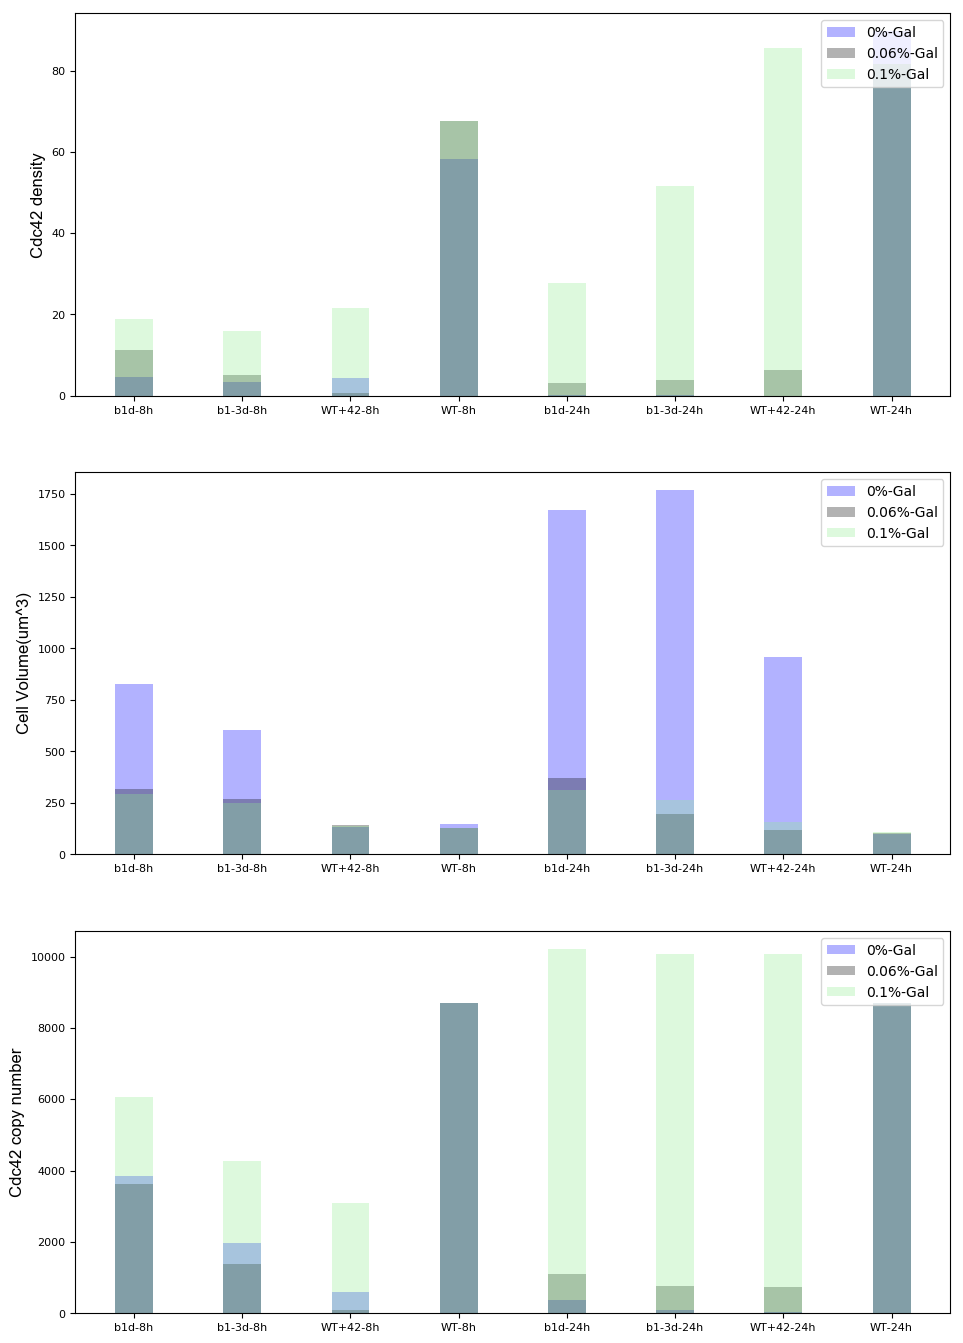

In [59]:
pd_reads=df_quantities.T
gal=['0%-Gal','0.06%-Gal','0.1%-Gal']
fig, axes = plt.subplots(3,1, figsize=(10,10), dpi=100, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0, right=1, top=1.3)
kwargs = dict(alpha=0.5, bins=20, density=True, stacked=True)
axis_font = {'fontname':'Arial', 'size':'12'}
#colors = cm.rainbow(np.linspace(0, 1, len(pd_reads[0:4])))
colors=['blue','black','lightgreen']

i=0
width = 0.35 
for keys, c in zip(gal,colors): 
    plt.subplot(3,1,1)
    plt.bar(x=pd_reads.T[keys].loc['Name'],height=pd_reads.T[keys].loc['cdc42 density'],alpha=0.3,width=width,color=colors[i],label=keys)
    plt.legend(prop={'size': 10},loc='upper right')
    plt.tick_params(labelsize=8)
    plt.ylabel('Cdc42 density',**axis_font)
    plt.subplot(3,1,2)
    plt.bar(x=pd_reads.T[keys].loc['Name'],height=pd_reads.T[keys].loc['cell volume'],alpha=0.3,width=width,color=colors[i],label=keys)
    plt.ylabel('Cell Volume(um^3)',**axis_font)
    plt.legend(prop={'size': 10},loc='upper right')
    plt.tick_params(labelsize=8)
    plt.subplot(3,1,3)
    plt.bar(x=pd_reads.T[keys].loc['Name'],height=pd_reads.T[keys].loc['cdc42_copy_number'],alpha=0.3,width=width,color=colors[i],label=keys)
    plt.ylabel('Cdc42 copy number',**axis_font)
    plt.legend(prop={'size': 10},loc='upper right')
    plt.tick_params(labelsize=8)
    i=i+1












## Previous calculation .... not precise

In [91]:


strains=['bem1d-8h','bem1dbem3d-8h','WT+cdc42-8h','WT-8h', 'bem1d-24h','bem1dbem3d-24h','WT+cdc42-24h','WT-24h']
names=['bem1d + Galpr-CDC42 @8h','bem1bem3 deleted + Galpr-CDC42 @8h','WT + Galpr-CDC42 @8h','WT @8h','bem1d + Galpr-CDC42 @24h',
      'bem1bem3 deleted + Galpr-CDC42 @24h','WT + Galpr-CDC42 @24h','WT @24h']
cdc42_number=np.array([[17403.24309,19488.8430,25512.73588 ],[ 10565.46437,9056.206906,18937.32872],[8232.235602 , 4449.688873,15036.78117],
                       [8690 , 8690,8690],[4768.488607,6958.508065,13958.24344],[2894.937236,2155.662341,13050.67689],[2255.632555,2090.102004,13036.95961],
                       [8690 , 8690, 8690]]) # estimated quantity
#cdc42_number=df.iloc[0,:]       
cell_radii=np.array([[5.825, 4.240, 4.125],[5.25, 3.995 , 3.915],[3.185,3.25,3.2],[3.29,3.13, 3.145],
                    [7.36,4.45,4.22],[7.5,3.6,3.97],[6.12,3.04,3.35],[2.85,2.94,2.96]]) # measured quantity
cell_radii_std=np.array([[0.601040764,0.22627417,0.318198052],[0.494974747,0.417193001,0.16263456],
                         [0.06363961,0.070710678,0.141421356],[0.296984848,0,0.06363961],[0.93,1.33,1.68],
                         [0.75,1.11,1.85],[0.93,1.29,0.75],[0.43,0.42,0.83]])


## Creating the dataframe of data from the estimated and measured quantities, above defined

In [92]:
reads=defaultdict(dict)
i=0
indexes=['Gal percentages','cdc42_copy_number','cell_radius(um)','cell_radius-std','cell volume(um^3)','cdc42 density(um^(-3))']
for strains_name in strains:
        reads[strains_name]['Gal percentages']=['0%','0.06%','0.1%']
        reads[strains_name]['Name']=names[i]
        reads[strains_name]['cdc42_copy_number']=cdc42_number[i,:]
        reads[strains_name]['cell_radius(um)']=cell_radii[i,:]
        reads[strains_name]['cell_radius-std']=cell_radii_std[i,:]
        reads[strains_name]['cell volume(um^3)']=4/3*math.pi*np.power(cell_radii[i,:],3)
        reads[strains_name]['cdc42 density(um^(-3))']=cdc42_number[i,:]/reads[strains_name]['cell volume(um^3)']
        i=i+1

In [182]:
df=pd.DataFrame(reads)
df.T

,Gal percentages,Name,cdc42 density(um^(-3)),cdc42_copy_number,cell volume(um^3),cell_radius(um),cell_radius-std
bem1d-8h,"[0%, 0.06%, 0.1%]",bem1d + Galpr-CDC42 @8h,"[21.02102012982369, 61.0379413968807, 86.77538...","[17403.24309, 19488.843, 25512.73588]","[827.8971706662824, 319.29063389080756, 294.00...","[5.825, 4.24, 4.125]","[0.601040764, 0.22627417, 0.318198052]"
bem1dbem3d-8h,"[0%, 0.06%, 0.1%]",bem1bem3 deleted + Galpr-CDC42 @8h,"[17.430990663264506, 33.90840611427235, 75.341...","[10565.46437, 9056.206906, 18937.32872]","[606.1310326019807, 267.078519570643, 251.3529...","[5.25, 3.995, 3.915]","[0.494974747, 0.417193001, 0.16263456]"
WT+cdc42-8h,"[0%, 0.06%, 0.1%]",WT + Galpr-CDC42 @8h,"[60.82762668237061, 30.945033235530122, 109.55...","[8232.235602, 4449.688873, 15036.78117]","[135.33711655375026, 143.7933137486828, 137.25...","[3.185, 3.25, 3.2]","[0.06363961, 0.070710678, 0.141421356]"
WT-8h,"[0%, 0.06%, 0.1%]",WT @8h,"[58.25637716182798, 67.65472833774263, 66.6913...","[8690.0, 8690.0, 8690.0]","[149.16821854301733, 128.4463069102607, 130.30...","[3.29, 3.13, 3.145]","[0.296984848, 0.0, 0.06363961]"
bem1d-24h,"[0%, 0.06%, 0.1%]",bem1d + Galpr-CDC42 @24h,"[2.8553457047958655, 18.851568595320984, 44.34...","[4768.488607, 6958.508065, 13958.24344]","[1670.021461496169, 369.1209052347571, 314.793...","[7.36, 4.45, 4.22]","[0.93, 1.33, 1.68]"
bem1dbem3d-24h,"[0%, 0.06%, 0.1%]",bem1bem3 deleted + Galpr-CDC42 @24h,"[1.6381993637340049, 11.030231391692288, 49.79...","[2894.937236, 2155.662341, 13050.67689]","[1767.1458676442585, 195.43219579451386, 262.0...","[7.5, 3.6, 3.97]","[0.75, 1.11, 1.85]"
WT+cdc42-24h,"[0%, 0.06%, 0.1%]",WT + Galpr-CDC42 @24h,"[2.349229675882288, 17.760619966065722, 82.785...","[2255.632555, 2090.102004, 13036.95961]","[960.1583779384465, 117.68181561192388, 157.47...","[6.12, 3.04, 3.35]","[0.93, 1.29, 0.75]"
WT-24h,"[0%, 0.06%, 0.1%]",WT @24h,"[89.61827642309831, 81.63740209038531, 79.9937...","[8690.0, 8690.0, 8690.0]","[96.96682804937576, 106.44630742142944, 108.63...","[2.85, 2.94, 2.96]","[0.43, 0.42, 0.83]"


## Save the data as a dataframe to a txt file 

In [183]:
df.to_excel('data-fig-s6.xlsx')

In [187]:
df_from_excel=pd.read_excel('data-fig-s6.xlsx',dtype='object')

In [188]:
df_from_excel.T
#issue: I have a problem when reading the exported dataframe , the format it is not the same as before :(

,Gal percentages,Name,cdc42 density(um^(-3)),cdc42_copy_number,cell volume(um^3),cell_radius(um),cell_radius-std
bem1d-8h,"['0%', '0.06%', '0.1%']",bem1d + Galpr-CDC42 @8h,[21.02102013 61.0379414 86.77538817],[17403.24309 19488.843 25512.73588],[827.89717067 319.29063389 294.00889373],[5.825 4.24 4.125],[0.60104076 0.22627417 0.31819805]
bem1dbem3d-8h,"['0%', '0.06%', '0.1%']",bem1bem3 deleted + Galpr-CDC42 @8h,[17.43099066 33.90840611 75.34159488],[10565.46437 9056.206906 18937.32872 ],[606.1310326 267.07851957 251.35290474],[5.25 3.995 3.915],[0.49497475 0.417193 0.16263456]
WT+cdc42-8h,"['0%', '0.06%', '0.1%']",WT + Galpr-CDC42 @8h,[ 60.82762668 30.94503324 109.55099723],[ 8232.235602 4449.688873 15036.78117 ],[135.33711655 143.79331375 137.25827743],[3.185 3.25 3.2 ],[0.06363961 0.07071068 0.14142136]
WT-8h,"['0%', '0.06%', '0.1%']",WT @8h,[58.25637716 67.65472834 66.69130533],[8690. 8690. 8690.],[149.16821854 128.44630691 130.30184306],[3.29 3.13 3.145],[0.29698485 0. 0.06363961]
bem1d-24h,"['0%', '0.06%', '0.1%']",bem1d + Galpr-CDC42 @24h,[ 2.8553457 18.8515686 44.34093087],[ 4768.488607 6958.508065 13958.24344 ],[1670.0214615 369.12090523 314.79364926],[7.36 4.45 4.22],[0.93 1.33 1.68]
bem1dbem3d-24h,"['0%', '0.06%', '0.1%']",bem1bem3 deleted + Galpr-CDC42 @24h,[ 1.63819936 11.03023139 49.79352911],[ 2894.937236 2155.662341 13050.67689 ],[1767.14586764 195.43219579 262.09584105],[7.5 3.6 3.97],[0.75 1.11 1.85]
WT+cdc42-24h,"['0%', '0.06%', '0.1%']",WT + Galpr-CDC42 @24h,[ 2.34922968 17.76061997 82.78531195],[ 2255.632555 2090.102004 13036.95961 ],[960.15837794 117.68181561 157.47913855],[6.12 3.04 3.35],[0.93 1.29 0.75]
WT-24h,"['0%', '0.06%', '0.1%']",WT @24h,[89.61827642 81.63740209 79.99374587],[8690. 8690. 8690.],[ 96.96682805 106.44630742 108.6334926 ],[2.85 2.94 2.96],[0.43 0.42 0.83]


## Selecting the relevant data for the plots

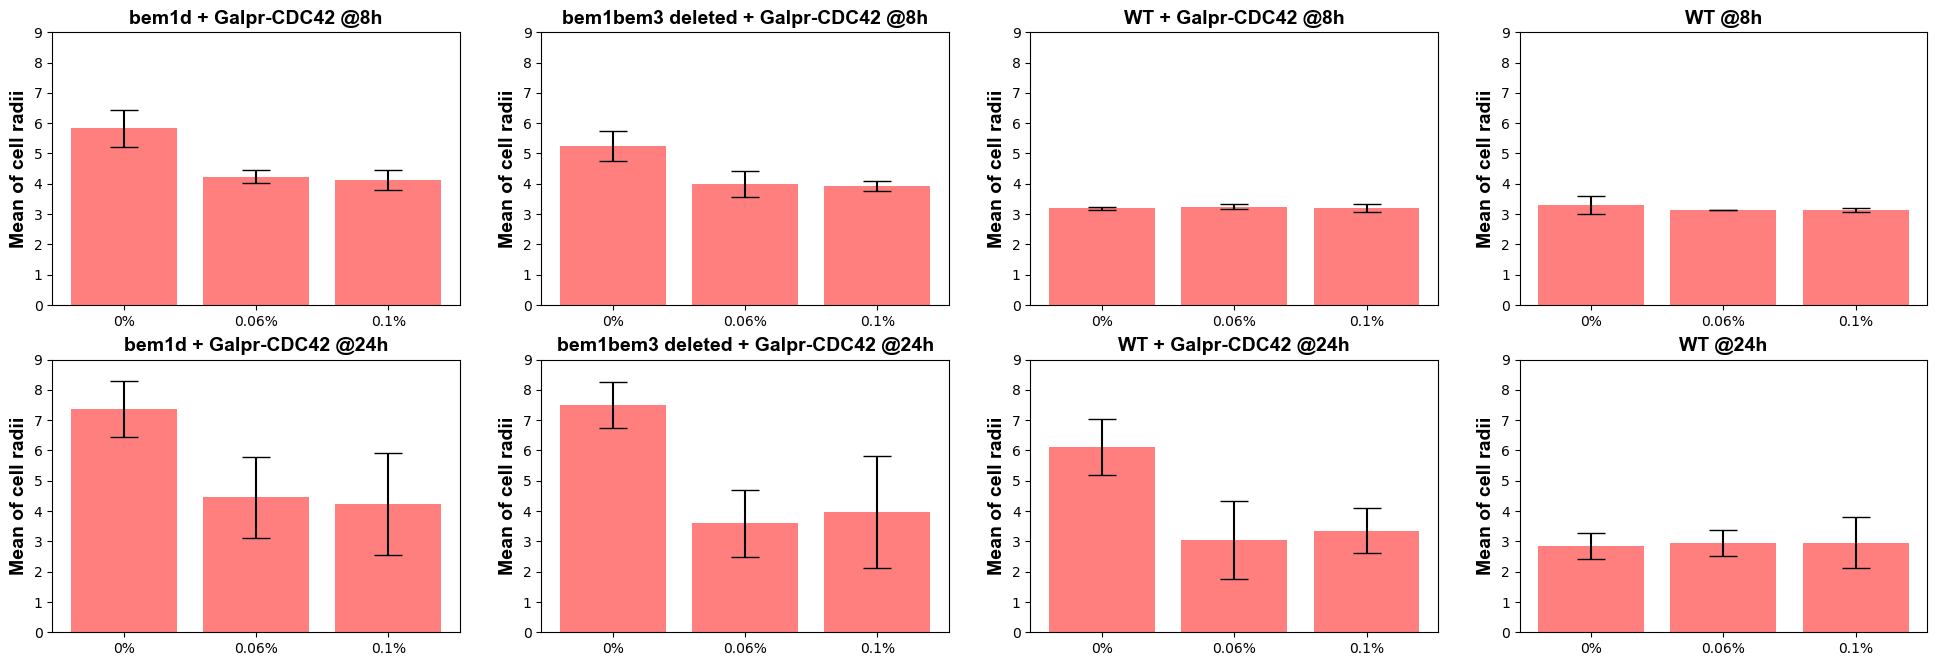

In [179]:
# cell radius plots


pd_reads=df.T

fig, axes = plt.subplots(2,4, figsize=(10,5), dpi=100, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.2, right=2, top=1.4)
axis_font = {'fontname':'Arial', 'size':'14','fontweight':'bold'}
gal_percentages=['0%','0.06%','0.1%']
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.bar(x=gal_percentages,height=pd_reads['cell_radius(um)'][i],yerr=pd_reads['cell_radius-std'][i],align='center', alpha=0.5, ecolor='black', color='red',capsize=10)
    plt.ylim(0,9)
    plt.title(pd_reads['Name'][i],**axis_font)
    plt.ylabel('Mean of cell radii',**axis_font)
    

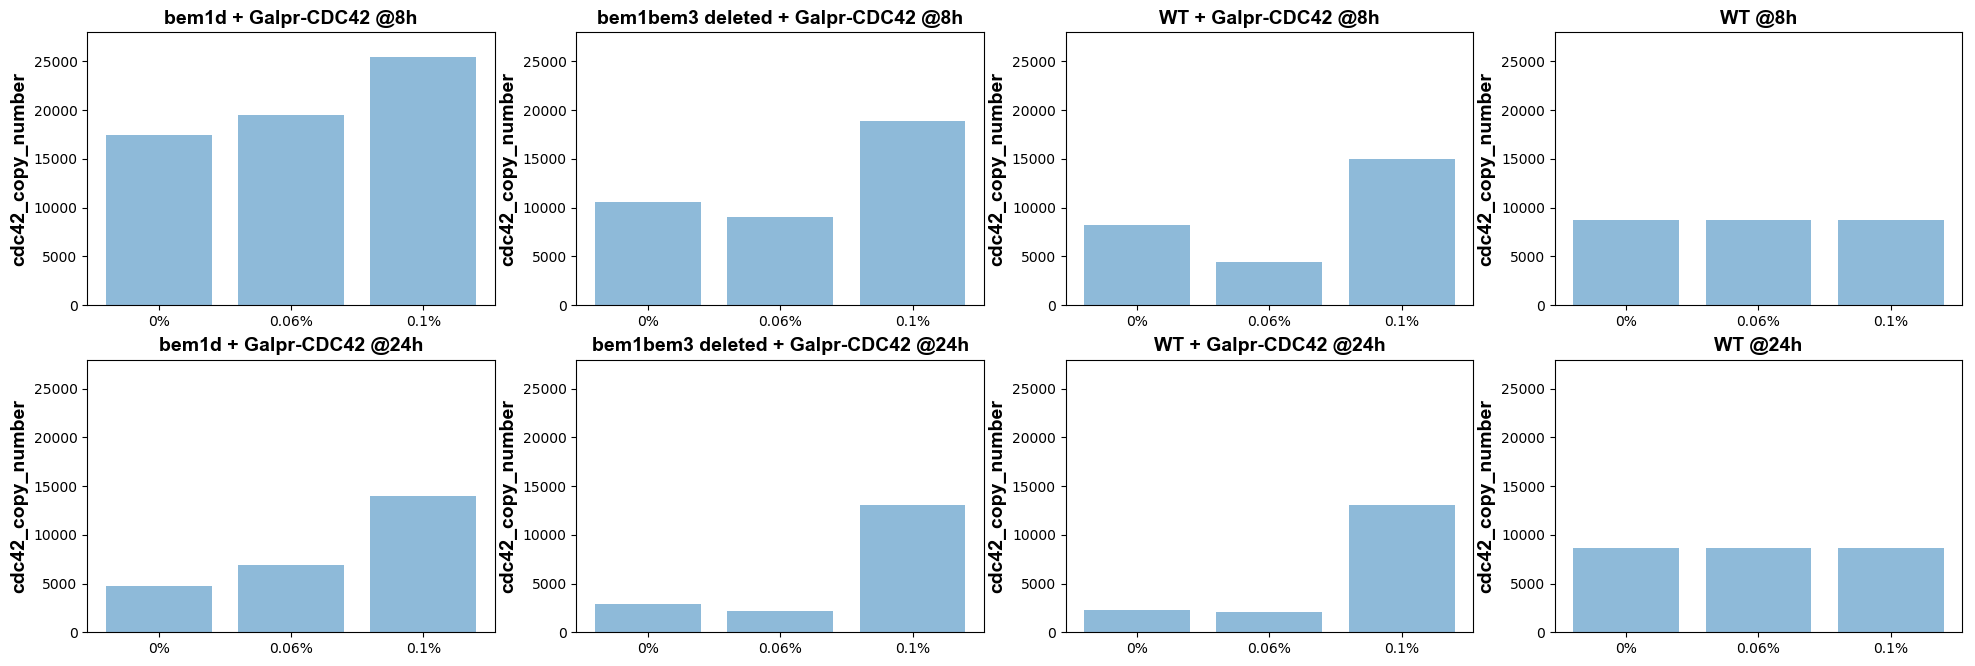

In [153]:
# cdc42 copy number

pd_reads=df.T

fig, axes = plt.subplots(2,4, figsize=(10,5), dpi=100, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.2, right=2, top=1.4)
kwargs = dict(alpha=0.5, bins=20, density=True, stacked=True)
axis_font = {'fontname':'Arial', 'size':'14','fontweight':'bold'}

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.bar(x=pd_reads['Gal-percentages'][i],height=pd_reads['cdc42_copy_number'][i], alpha=0.5)
    plt.ylim(0,28000)
    plt.title(pd_reads['name'][i],**axis_font)
    plt.ylabel('cdc42_copy_number',**axis_font)
    
    


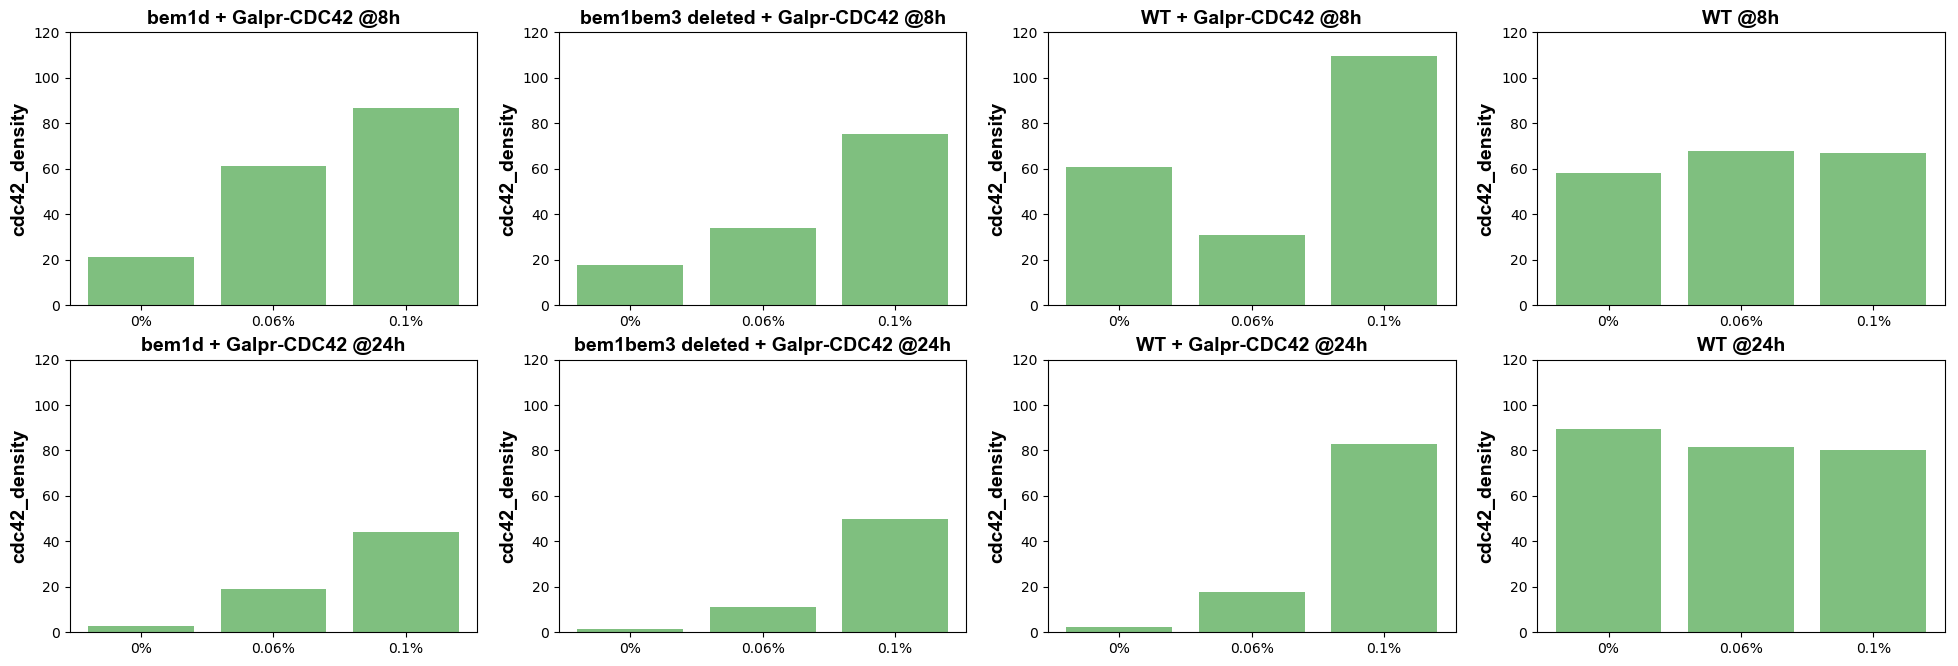

In [92]:
# cell density

pd_reads=df.T
fig, axes = plt.subplots(2,4, figsize=(10,5), dpi=100, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.2, right=2, top=1.4)
kwargs = dict(alpha=0.5, bins=20, density=True, stacked=True)
axis_font = {'fontname':'Arial', 'size':'14','fontweight':'bold'}

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.bar(x=pd_reads['Gal-percentages'][i],height=pd_reads['cdc42 density(um^(-3))'][i], alpha=0.5,color='green')
    plt.ylim(0,120)
    plt.title(pd_reads['name'][i],**axis_font)
    plt.ylabel('cdc42_density',**axis_font)